# Tutorial

<b>Warning: it is necessary to use <u>setups='sg15'</u> in GPAW</b> (ONCV pseudopotentials)

In [1]:
from gpaw import GPAW, FermiDirac
from gpaw.wavefunctions.pw import PW
from ase.io import read
from TDDFT import TDDFT
import numpy as np
from tqdm import tqdm
from ase.units import Hartree, Bohr
import matplotlib.pyplot as plt
from gpaw.external import ConstantElectricField
%matplotlib inline

c = 20
PW_cut=200
atoms = read('hBN.cif')
atoms.cell[2,2]=c
atoms.center()

calc = GPAW(mode=PW(PW_cut),xc='PBE',
            kpts={'size': (4, 4, 1)},
            setups='sg15',
            occupations=FermiDirac(0.0001))

atoms.set_calculator(calc)
atoms.get_potential_energy()
calc.write('gs_sg15.gpw')


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.5.1
 |___|_|             

User:   drg@forsite
Date:   Mon Apr  8 18:01:32 2019
Arch:   x86_64
Pid:    13567
Python: 3.6.7
gpaw:   /usr/local/lib/python3.6/dist-packages/gpaw
_gpaw:  /usr/local/lib/python3.6/dist-packages/
        _gpaw.cpython-36m-x86_64-linux-gnu.so
ase:    /home/drg/.local/lib/python3.6/site-packages/ase (version 3.17.0)
numpy:  /home/drg/.local/lib/python3.6/site-packages/numpy (version 1.16.2)
scipy:  /home/drg/.local/lib/python3.6/site-packages/scipy (version 1.2.1)
units:  Angstrom and eV
cores:  1

Input parameters:
  kpts: {size: (4, 4, 1)}
  mode: {ecut: 200.0,
         gammacentered: False,
         name: pw}
  occupations: {name: fermi-dirac,
                width: 0.0001}
  setups: sg15
  xc: PBE

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

Norm-conserving UPF setup:
  Element:    B
  Z:          5
  Valence:  3.0

# Initialization 

In [2]:
from TDDFT import TDDFT
tddft=TDDFT(calc)

100%|██████████| 8/8 [00:00<00:00,  9.50it/s]


In [3]:
dt=1;steps=10000;
E=np.zeros(steps);
time=np.arange(steps)*dt
E=lambda t:1e-4*np.exp(-t/dt)
tddft.propagate(dt=dt,steps=steps,E=E,direction=[0,0,1])

100%|██████████| 10000/10000 [00:48<00:00, 207.30it/s]


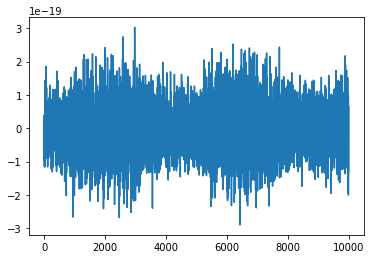

In [5]:
plt.plot(time,tddft.P.real)

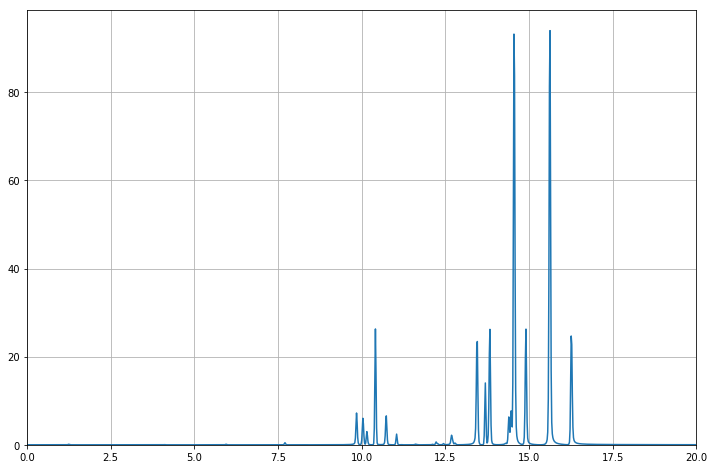

In [6]:
spectrum=np.fft.fft(tddft.P)
freq = np.fft.fftfreq(steps, d=dt)*2*np.pi*Hartree
spectrum=spectrum[np.argsort(freq)]
freq=np.sort(freq)
spectrum=np.abs(spectrum*freq)**2
from scipy.ndimage.filters import gaussian_filter1d
plt.figure(figsize=(12,8))
# plt.plot(omega*Hartree,epsilon.imag)
plt.plot(freq,gaussian_filter1d(spectrum,1),'-')
# plt.plot(data[inds_w, 0], 4 * np.pi * data[inds_w, 4],label='real')
# plt.legend(loc='best')
plt.xlim([0,20])
plt.ylim([0,None])
plt.grid()
plt.savefig('spectrum_.png')

In [7]:
nm_to_au=1/(1240*Hartree)
fs_to_au=41

In [13]:
freq=1600*nm_to_au
T=15*fs_to_au
E0=1e-3

dt=1;steps=10000;
E=np.zeros(steps);
time=np.arange(steps)*dt
E=lambda t:E0*np.sin(np.pi*t/T)**2*np.cos(freq*t)*(t<T)
tddft.propagate(dt=dt,steps=steps,E=E,direction=[0,0,1])

100%|██████████| 10000/10000 [00:49<00:00, 201.43it/s]


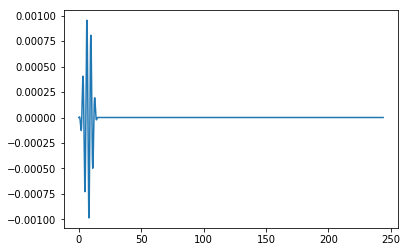

In [14]:
plt.plot(time/fs_to_au,E(time))

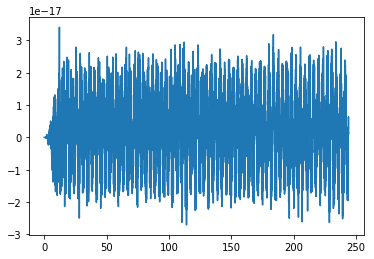

In [15]:
plt.plot(time/fs_to_au,tddft.P.real)

/home/drg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


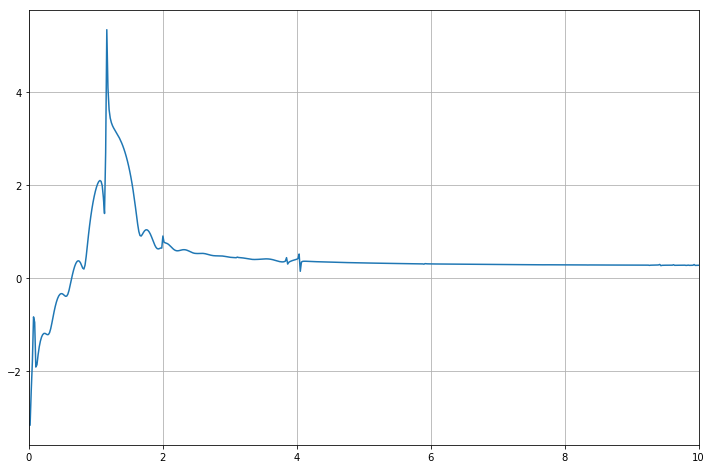

In [16]:
spectrum=np.fft.fft(tddft.P)
freq = np.fft.fftfreq(steps, d=dt)*2*np.pi*Hartree
spectrum=spectrum[np.argsort(freq)]
freq=np.sort(freq)
spectrum=np.abs(spectrum*freq)**2
from scipy.ndimage.filters import gaussian_filter1d
plt.figure(figsize=(12,8))
# plt.plot(omega*Hartree,epsilon.imag)
plt.plot(freq,np.log10(spectrum),'-')
# plt.plot(data[inds_w, 0], 4 * np.pi * data[inds_w, 4],label='real')
# plt.legend(loc='best')
plt.xlim([0,10])
# plt.ylim([0,None])
plt.grid()
plt.savefig('spectrum_.png')